In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns 
import math
import random
from scipy.integrate import simps
from sklearn.manifold import TSNE
from scipy.integrate import simps
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from statannot import add_stat_annotation
import scipy.signal
from scipy.stats import exponnorm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from lmfit.models import GaussianModel
from lmfit.models import GaussianModel,ExponentialGaussianModel,SkewedGaussianModel,VoigtModel,LorentzianModel,LognormalModel
from scipy.signal import savgol_filter, find_peaks, find_peaks_cwt
from scipy import sparse
from scipy.sparse.linalg import spsolve
import scipy
import pybaselines
import hplc.io
from hplc.quant import Chromatogram

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["font.family"] = "Arial"
sns.set(font_scale=2)
sns.set_style("ticks")

In [5]:
def make_entry(csv, sample_name,topfluor_normalization=1): 
    """
    Inputs: HPLC trace (csv), lipid class (string), genetic background (string),multiplier (to make visible int)
    and topfluor (an int representing the amount of topfluor in the sample that is used as a normalization control)
    Outputs: An array of dictionaries for each moment in the hplc trace 
    """
    hplc=[]
    area=0
    for row in csv.itertuples():
        if row[1]>5 and row[1]<80:
            area+=row[3]
    print(area/100)
    area=area/100
    #iterates through the rows of the CSV and adds a dictionary entry for that time point 
    for row in csv.itertuples():
        #iterates through the rows of the CSV and adds a dictionary entry for that time point 
        if isinstance(row[3],str):
            hplc.append({"Time":row[1],"Value":float(row[3].replace(',',''))/topfluor_normalization, "Name":sample_name})
        else: 
            hplc.append({"Time":row[1],"Value":row[3]/area, "Colonization Status":sample_name})
    return hplc

In [6]:
#fig6=pd.read_excel("figure6_data.xlsx")
hplcs=[]
ndgf1=pd.read_csv("fig6/ND GF 1_07_CAD_1.txt",sep="\t")
nd5s1=pd.read_csv("fig6/ND 5s 1_04_CAD_1.txt",sep="\t")

hplcs+=make_entry(ndgf1,"Germ Free")
hplcs+=make_entry(nd5s1,"Colonized")

hplc=pd.DataFrame(hplcs)
hplc

1413.8887755599987
1958.5165446299989


,Time,Value,Colonization Status
0,0.000000,-0.000009,Germ Free
1,0.001650,-0.000004,Germ Free
2,0.003317,0.000005,Germ Free
3,0.004983,0.000012,Germ Free
4,0.006650,0.000017,Germ Free
...,...,...,...
127677,107.494083,-0.000007,Colonized
127678,107.495750,0.000012,Colonized
127679,107.497417,0.000027,Colonized
127680,107.499083,0.000031,Colonized


# 6A Inset

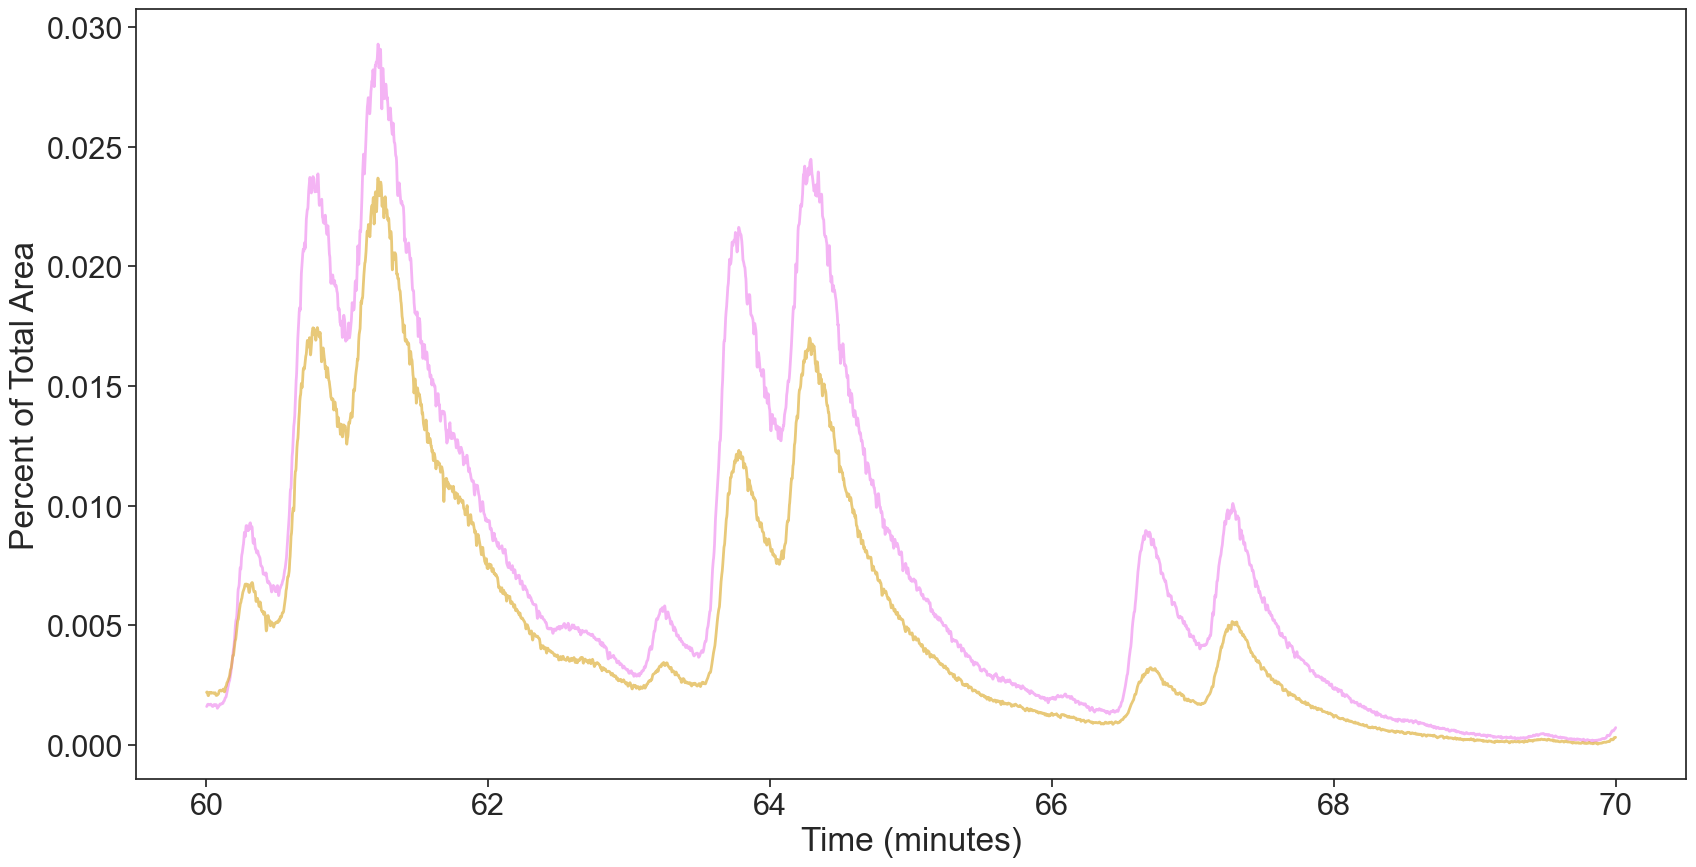

In [8]:

fig,ax=plt.subplots(1,1,figsize=(20,10))

sns.lineplot(data=hplc[(hplc.Time>60) & (hplc.Time<70)],x="Time",y="Value",hue="Colonization Status",ax=ax,alpha=0.6,linewidth=2,palette=["violet","goldenrod"],legend=False)
ax.set(ylabel="Percent of Total Area",xlabel="Time (minutes)")
plt.show()

# 6A Full

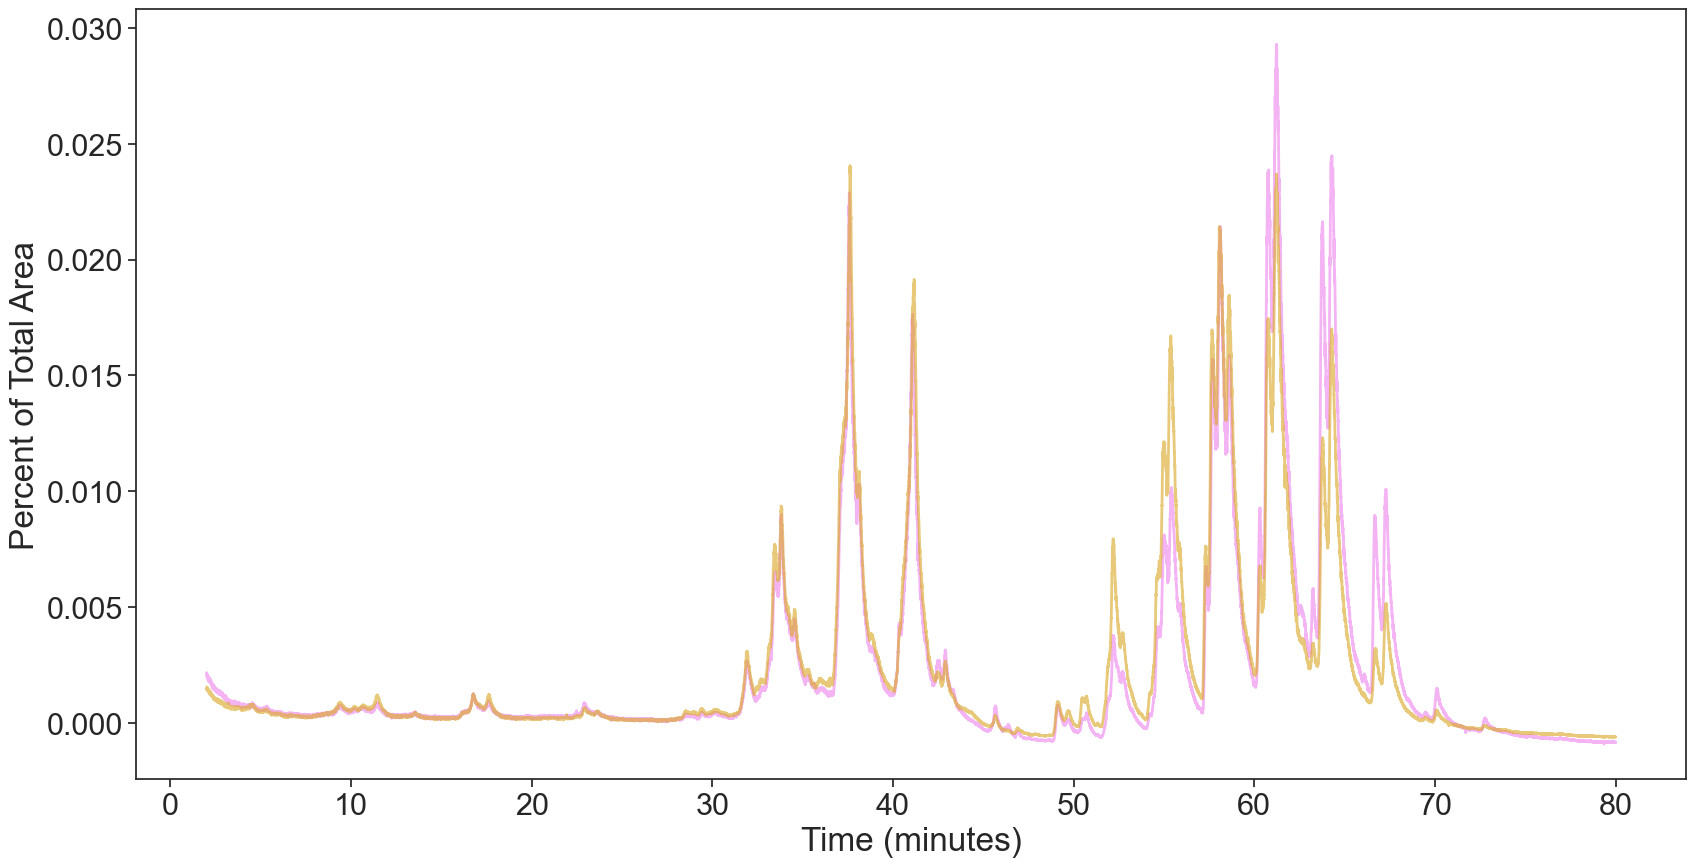

In [9]:

fig,ax=plt.subplots(1,1,figsize=(20,10))

sns.lineplot(data=hplc[(hplc.Time>2) & (hplc.Time<80)],x="Time",y="Value",hue="Colonization Status",ax=ax,alpha=0.6,linewidth=2,palette=["violet","goldenrod"],legend=False)
ax.set(ylabel="Percent of Total Area",xlabel="Time (minutes)")
plt.show()

In [3]:
fig6=pd.read_excel("figure6_percentages_new.xlsx")
fig6["MicroAlgo"]=fig6["Algorithm"]+" "+fig6["Microbial"]

In [4]:
fig6

,Peak,Algorithm,Microbial,Replicate,% Area,MicroAlgo
0,60.3,Chromeleon,Germ Free,1,1.670,Chromeleon Germ Free
1,60.3,Chromeleon,Germ Free,2,1.470,Chromeleon Germ Free
2,60.3,Chromeleon,Germ Free,3,1.480,Chromeleon Germ Free
3,60.3,Chromeleon,Colonized,1,1.080,Chromeleon Colonized
4,60.3,Chromeleon,Colonized,2,0.950,Chromeleon Colonized
...,...,...,...,...,...,...
91,67.0,PeakClimber,Germ Free,2,2.050,PeakClimber Germ Free
92,67.0,PeakClimber,Germ Free,3,3.370,PeakClimber Germ Free
93,67.0,PeakClimber,Colonized,1,1.610,PeakClimber Colonized
94,67.0,PeakClimber,Colonized,2,1.869,PeakClimber Colonized


# Figure 6C

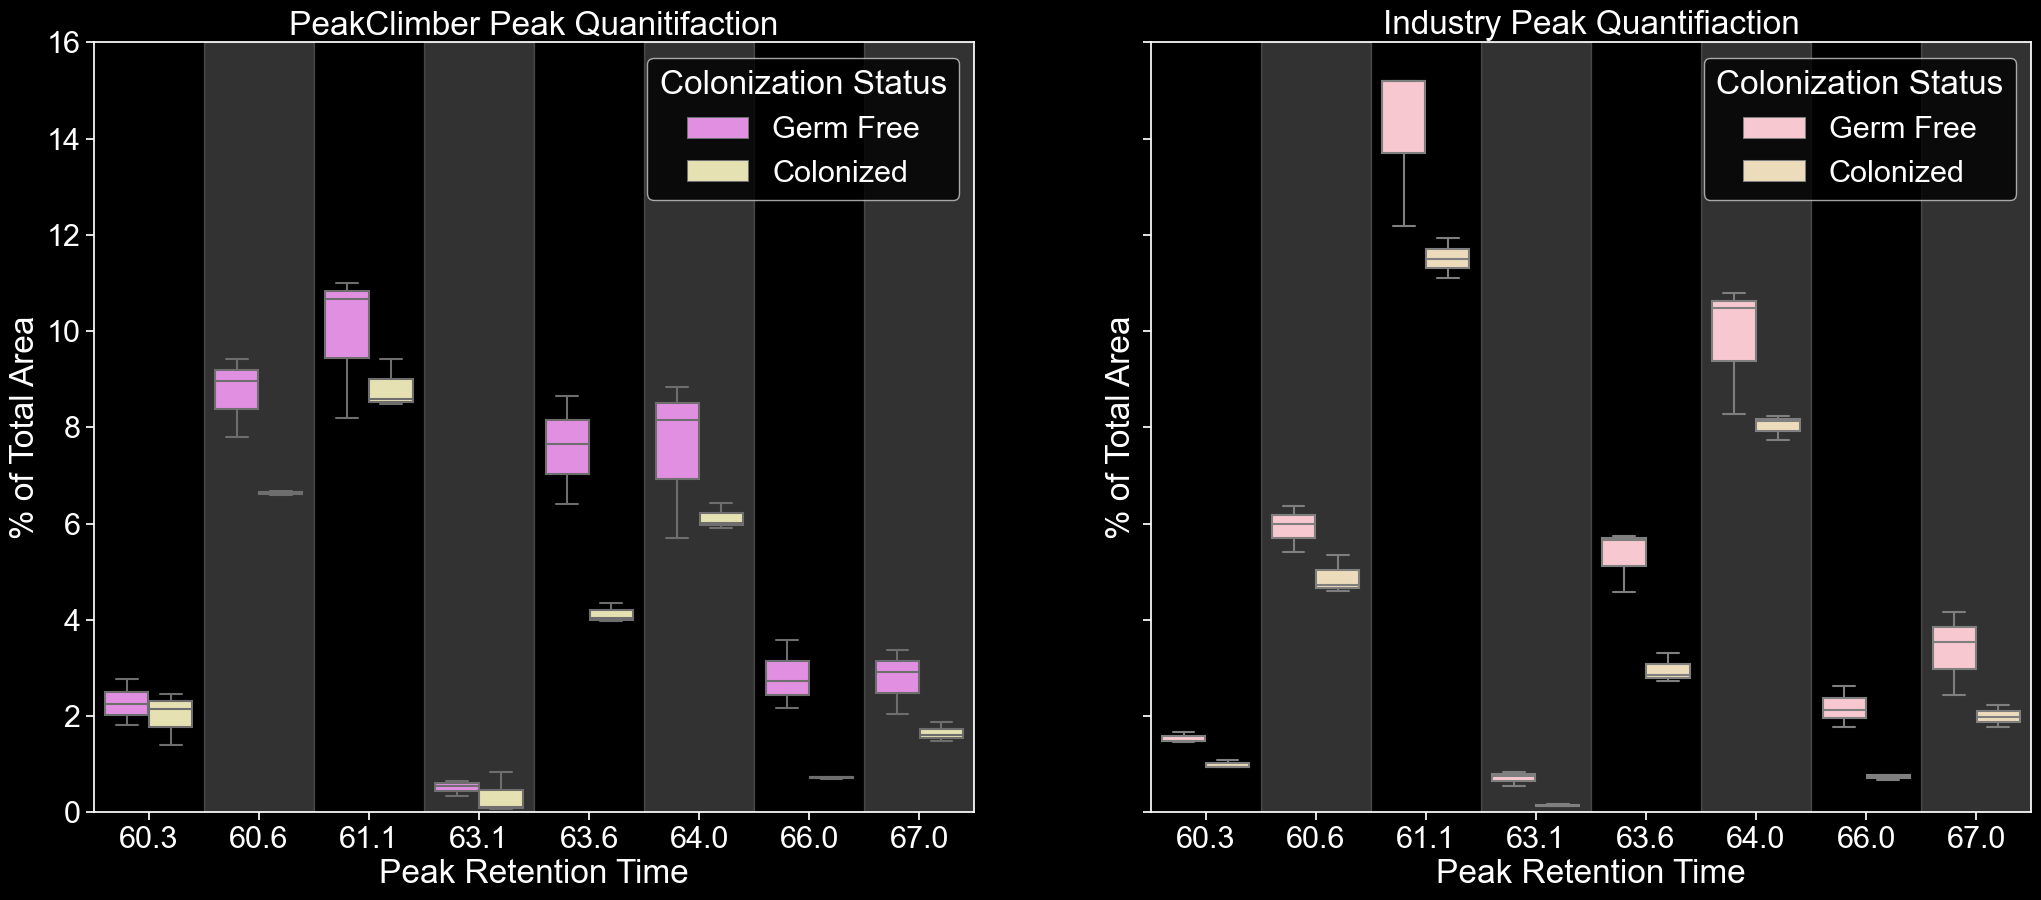

In [10]:
fig,ax=plt.subplots(1,2,figsize=(25,10),sharey=True)

for i in range(0, 7,2):
    ax[0].axvspan(i+0.5, i+1.5, facecolor='white', alpha=0.2,zorder=-100)
    ax[1].axvspan(i+0.5, i+1.5, facecolor='white', alpha=0.2,zorder=-100)
sns.boxplot(data=fig6[fig6.Algorithm=="PeakClimber"],x="Peak",y="% Area",hue="Microbial",ax=ax[0],palette=["violet","palegoldenrod"])
sns.boxplot(data=fig6[fig6.Algorithm=="Chromeleon"],x="Peak",y="% Area",hue="Microbial",ax=ax[1],palette=["pink","wheat"])

ax[0].legend(title='Colonization Status',loc='upper right')
ax[1].legend(title='Colonization Status',loc='upper right')
ax[0].set(ylabel="% of Total Area",xlabel="Peak Retention Time",title="PeakClimber Peak Quanitifaction",ylim=[0,16])
ax[1].set(ylabel="% of Total Area",xlabel="Peak Retention Time",title="Industry Peak Quantifiaction",ylim=[0,16])




"""
box_pairs=[
    ((63.0,"Chromeleon Germ Free"),(63.0,"PeakClimber Germ Free")),
    ((63.0,"Chromeleon Colonized"),(63.0,"PeakClimber Colonized")),
    ((64.0,"Chromeleon Colonized"),(64.0,"PeakClimber Colonized")),
    ((64.0,"Chromeleon Germ Free"),(64.0,"PeakClimber Germ Free"))



    
]
add_stat_annotation(ax=ax,data=fig6, x="Peak", y='% Area', hue="MicroAlgo",
                    box_pairs=box_pairs,
                    test='t-test_paired', text_format='star', loc='inside', verbose=2,color='k')

"""
plt.show()

# Unused Figures

[Text(0, 0.5, 'Peak ratio')]

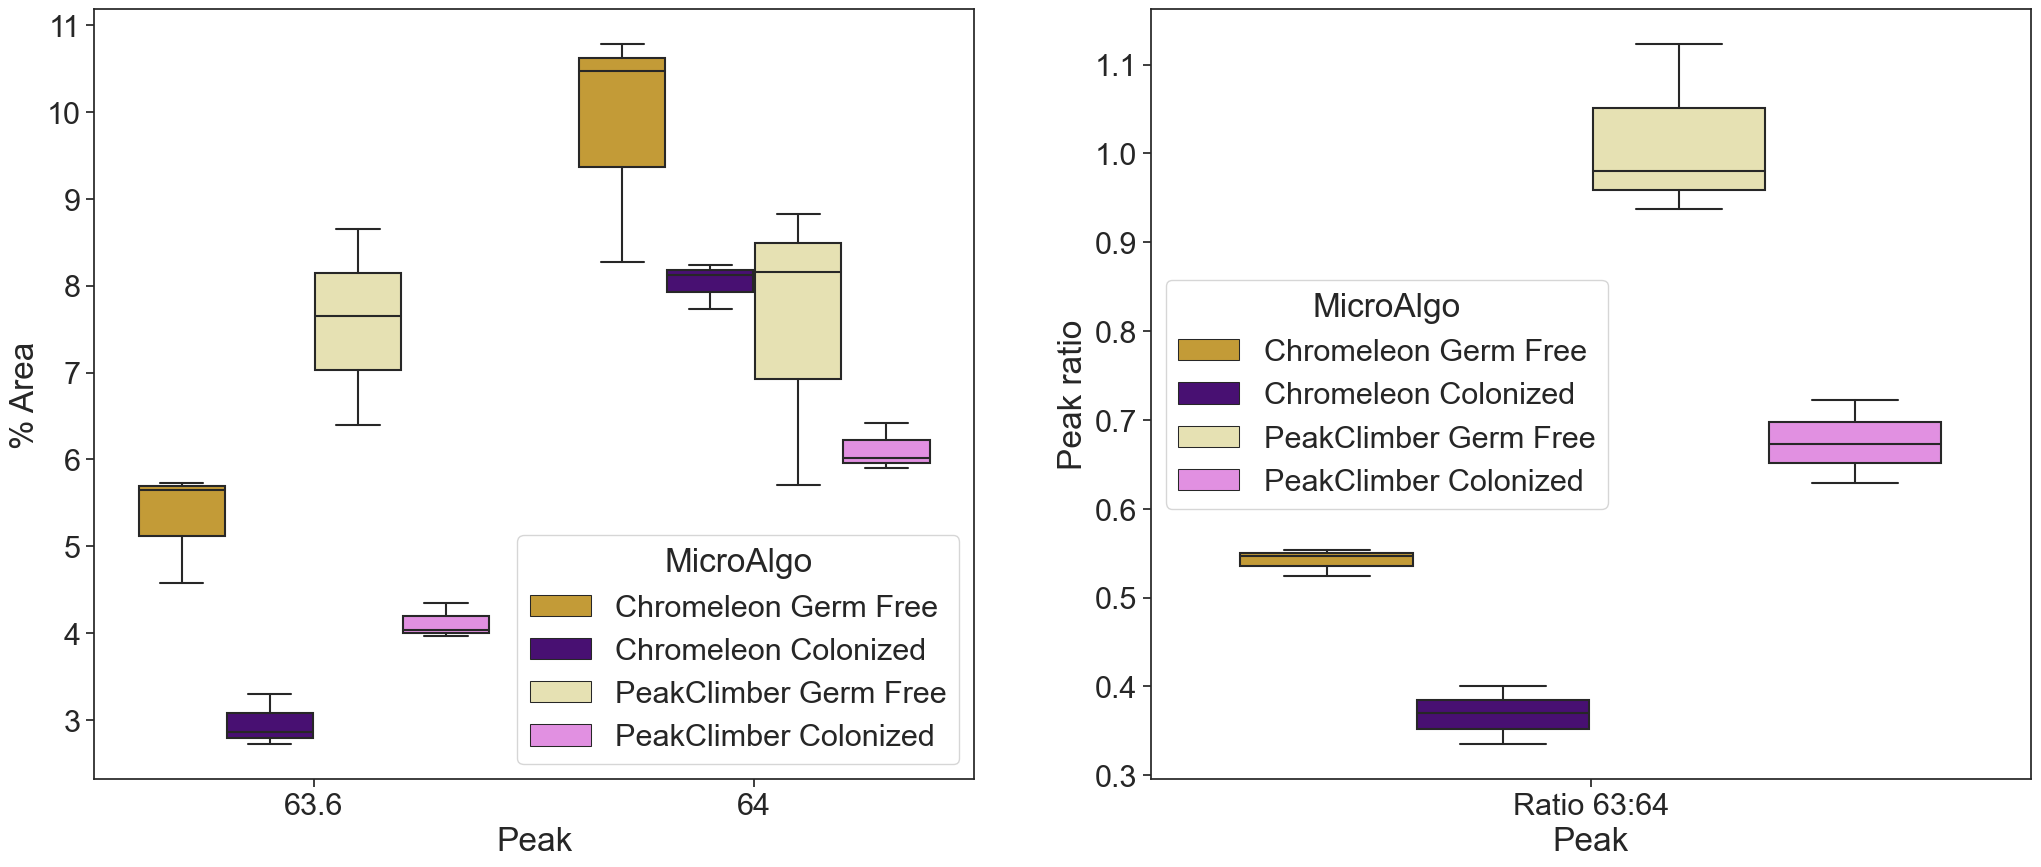

In [47]:
fig,ax=plt.subplots(1,2,figsize=(25,10),sharey=False)
sns.boxplot(data=fig6[(fig6.Peak==63.6) | (fig6.Peak==64) ],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[0],palette=["goldenrod","indigo","palegoldenrod","violet"])
sns.boxplot(data=fig6[(fig6.Peak=="Ratio 63:64")],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[1],palette=["goldenrod","indigo","palegoldenrod","violet"])
ax[1].set(ylabel="Peak ratio")
#sns.boxplot(data=fig6[(fig6.Peak==60.6) | (fig6.Peak==61.1)],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[0],palette=["goldenrod","indigo","palegoldenrod","violet"])

#sns.boxplot(data=fig6[fig6.Algorithm=="Chromeleon"],x="Peak",y="% Area",hue="Microbial",ax=ax[1],palette=["goldenrod","indigo"])


In [33]:
fig6r=pd.read_excel("fig6 ratios.xlsx")
fig6r["MicroAlgo"]=fig6r["Algorithm"]+" "+fig6r["Microbial"]

'\nbox_pairs=[\n    (("60.6:61.1 Ratio","Chromeleon Germ Free"),("60.6:61.1 Ratio","Chromeleon Colonized")),\n    (("60.6:61.1 Ratio","PeakClimber Germ Free"),("60.6:61.1 Ratio","PeakClimber Colonized")),\n\n\n\n\n\n    \n]\nadd_stat_annotation(ax=ax[0],data=fig6r, x="Peak", y=\'% Area\', hue="MicroAlgo",\n                    box_pairs=box_pairs,\n                    test=\'t-test_ind\', text_format=\'simple\', loc=\'inside\', verbose=2,color=\'k\')\n\nbox_pairs2=[\n    (("66:67 Ratio","Chromeleon Germ Free"),("66:67 Ratio","Chromeleon Colonized")),\n    (("66:67 Ratio","PeakClimber Germ Free"),("66:67 Ratio","PeakClimber Colonized")),\n\n\n\n\n\n    \n]\nadd_stat_annotation(ax=ax[1],data=fig6r[(fig6r.Peak=="66:67 Ratio")], x="Peak", y=\'% Area\', hue="MicroAlgo",\n                    box_pairs=box_pairs2,\n                    test=\'t-test_ind\', text_format=\'simple\', loc=\'inside\', verbose=2,color=\'k\')\n'

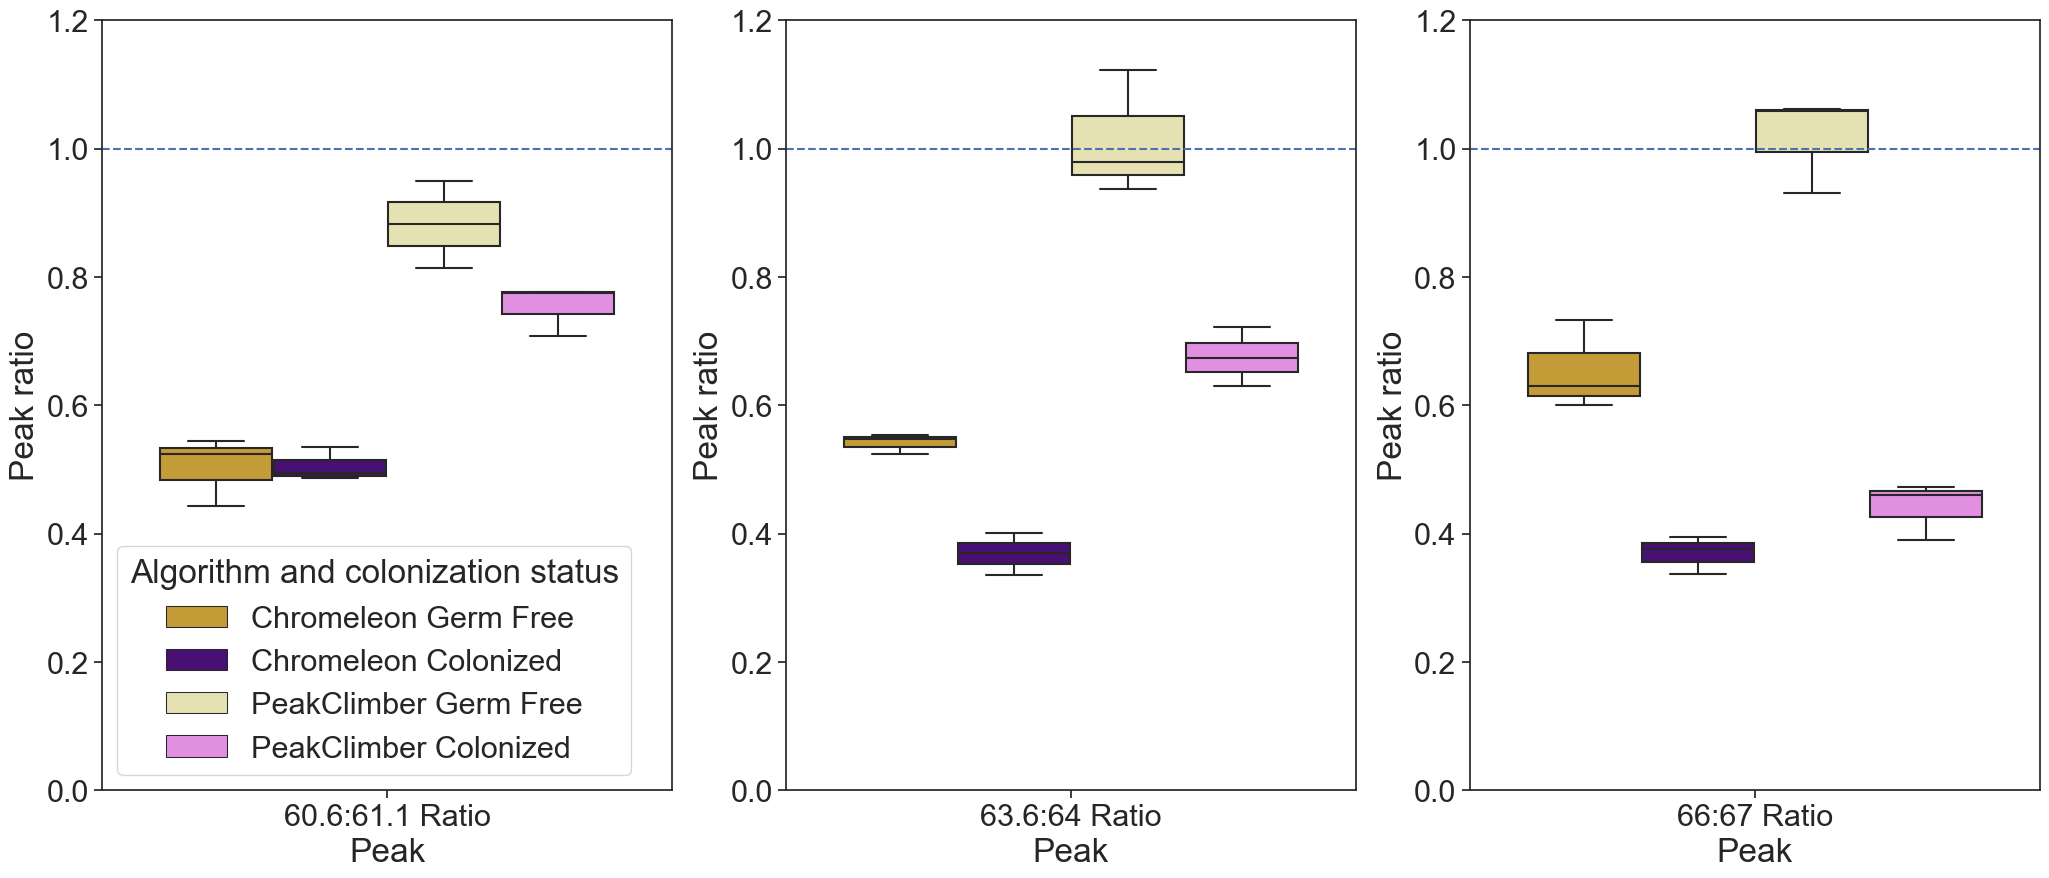

In [40]:
fig,ax=plt.subplots(1,3,figsize=(25,10),sharey=False)
sns.boxplot(data=fig6r[(fig6r.Peak=="60.6:61.1 Ratio")],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[0],palette=["goldenrod","indigo","palegoldenrod","violet"])
sns.boxplot(data=fig6r[(fig6r.Peak=="63.6:64 Ratio")],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[1],palette=["goldenrod","indigo","palegoldenrod","violet"])
sns.boxplot(data=fig6r[(fig6r.Peak=="66:67 Ratio")],x="Peak",y="% Area",hue="MicroAlgo",ax=ax[2],palette=["goldenrod","indigo","palegoldenrod","violet"])

ax[0].set(ylabel="Peak ratio",ylim=[0,1.2])
ax[1].set(ylabel="Peak ratio",ylim=[0,1.2])
ax[2].set(ylabel="Peak ratio",ylim=[0,1.2])
ax[0].legend(title="Algorithm and colonization status")
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[0].axhline(1, ls='--')
ax[1].axhline(1, ls='--')
ax[2].axhline(1, ls='--')
"""
box_pairs=[
    (("60.6:61.1 Ratio","Chromeleon Germ Free"),("60.6:61.1 Ratio","Chromeleon Colonized")),
    (("60.6:61.1 Ratio","PeakClimber Germ Free"),("60.6:61.1 Ratio","PeakClimber Colonized")),





    
]
add_stat_annotation(ax=ax[0],data=fig6r, x="Peak", y='% Area', hue="MicroAlgo",
                    box_pairs=box_pairs,
                    test='t-test_ind', text_format='simple', loc='inside', verbose=2,color='k')

box_pairs2=[
    (("66:67 Ratio","Chromeleon Germ Free"),("66:67 Ratio","Chromeleon Colonized")),
    (("66:67 Ratio","PeakClimber Germ Free"),("66:67 Ratio","PeakClimber Colonized")),





    
]
add_stat_annotation(ax=ax[1],data=fig6r[(fig6r.Peak=="66:67 Ratio")], x="Peak", y='% Area', hue="MicroAlgo",
                    box_pairs=box_pairs2,
                    test='t-test_ind', text_format='simple', loc='inside', verbose=2,color='k')
"""

